In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
time_df = pd.read_csv("time_bin_info.csv")
time_df.head()

,TimeStamp,TimeBin,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,...,Neuron92,Neuron93,Neuron94,x_position,y_position,x_velocity,y_velocity,x_acceleration,y_acceleration,TargetOn
0,23.79,1,0,0,0,0,0,0,0,0,...,0,0,0,-3.528073,1.246197,-0.058506,-0.091257,-27.356562,-17.469933,0
1,23.80,2,0,0,0,0,0,0,0,0,...,0,0,0,-3.528866,1.245791,-0.022758,0.039102,23.217614,13.524994,0
2,23.81,3,0,0,0,0,0,0,0,0,...,0,0,0,-3.528202,1.245970,0.080537,-0.041023,-12.605531,-10.911118,0
3,23.82,4,0,0,0,0,0,0,0,0,...,0,0,0,-3.528681,1.245885,-0.140814,0.072169,-6.628672,17.104540,0
4,23.83,5,0,0,0,0,0,0,0,0,...,1,0,0,-3.528435,1.245922,0.280550,-0.193932,67.613019,-62.822279,0


In [4]:
time_df.describe()

,TimeStamp,TimeBin,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,...,Neuron92,Neuron93,Neuron94,x_position,y_position,x_velocity,y_velocity,x_acceleration,y_acceleration,TargetOn
count,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,...,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000
mean,537.525407,61.832078,0.031251,0.009474,0.017693,0.005892,0.056326,0.023350,0.034616,0.019701,...,0.033795,0.016186,0.020605,-2.220139,1.602596,0.226046,0.214150,-0.125598,-0.388182,0.008302
std,282.069265,36.683712,0.176480,0.098416,0.133223,0.077835,0.238193,0.153325,0.184265,0.139814,...,0.182913,0.126986,0.146812,4.023312,4.139117,6.595670,6.561632,44.399562,51.277240,0.090739
min,23.790000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-12.010817,-6.893995,-25.712475,-28.699107,-485.899661,-250.236862,0.000000
25%,295.932500,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-5.270932,-1.809327,-3.361311,-2.984294,-28.827701,-31.379592,0.000000
50%,550.525000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.019185,1.535253,0.140044,-0.011029,0.279343,0.685039,0.000000
75%,764.707500,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.914206,4.823238,4.041670,3.223755,28.757748,31.221351,0.000000
max,1027.820000,170.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,7.746613,11.303367,25.642140,30.728159,219.008864,309.034342,1.000000


In [7]:
time_df_clean = time_df.drop(["TimeStamp", "TimeBin", "x_position", "y_position", "TargetOn"], axis=1)
time_df_clean.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron89,Neuron90,Neuron91,Neuron92,Neuron93,Neuron94,x_velocity,y_velocity,x_acceleration,y_acceleration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.058506,-0.091257,-27.356562,-17.469933
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,-0.022758,0.039102,23.217614,13.524994
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.080537,-0.041023,-12.605531,-10.911118
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.140814,0.072169,-6.628672,17.104540
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.280550,-0.193932,67.613019,-62.822279


In [11]:
abs_vel = (time_df_clean["x_velocity"].pow(2) + time_df_clean["y_velocity"].pow(2)).pow(0.5)
time_df_clean["abs_velocity"] = abs_vel
time_df_clean.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron91,Neuron92,Neuron93,Neuron94,x_velocity,y_velocity,x_acceleration,y_acceleration,absolute_velocity,abs_velocity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.058506,-0.091257,-27.356562,-17.469933,0.108401,0.108401
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.022758,0.039102,23.217614,13.524994,0.045242,0.045242
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.080537,-0.041023,-12.605531,-10.911118,0.090383,0.090383
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.140814,0.072169,-6.628672,17.104540,0.158231,0.158231
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.280550,-0.193932,67.613019,-62.822279,0.341054,0.341054


In [14]:
abs_accel = (time_df_clean["x_acceleration"].pow(2) + time_df_clean["y_acceleration"].pow(2)).pow(0.5)
time_df_clean["abs_acceleration"] = abs_accel
time_df_clean.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron91,Neuron92,Neuron93,Neuron94,x_velocity,y_velocity,x_acceleration,y_acceleration,abs_velocity,abs_acceleration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.058506,-0.091257,-27.356562,-17.469933,0.108401,32.458898
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.022758,0.039102,23.217614,13.524994,0.045242,26.869743
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.080537,-0.041023,-12.605531,-10.911118,0.090383,16.671890
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.140814,0.072169,-6.628672,17.104540,0.158231,18.344061
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.280550,-0.193932,67.613019,-62.822279,0.341054,92.293873


In [26]:
time_df_clean.describe()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron91,Neuron92,Neuron93,Neuron94,x_velocity,y_velocity,x_acceleration,y_acceleration,abs_velocity,abs_acceleration
count,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,...,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000
mean,0.031251,0.009474,0.017693,0.005892,0.056326,0.023350,0.034616,0.019701,0.044090,0.020739,...,0.040658,0.033795,0.016186,0.020605,0.226046,0.214150,-0.125598,-0.388182,7.488616,58.162533
std,0.176480,0.098416,0.133223,0.077835,0.238193,0.153325,0.184265,0.139814,0.209732,0.146221,...,0.205962,0.182913,0.126986,0.146812,6.595670,6.561632,44.399562,51.277240,5.529424,34.898510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-25.712475,-28.699107,-485.899661,-250.236862,0.001179,0.049305
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-3.361311,-2.984294,-28.827701,-31.379592,2.998130,31.670225
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.140044,-0.011029,0.279343,0.685039,6.357946,52.827369
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.041670,3.223755,28.757748,31.221351,10.867802,78.708112
max,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,25.642140,30.728159,219.008864,309.034342,35.412962,556.251392


### Feature Engineering and Exploration
Now that the dataset is clean and ready we can look at the data skew, distribution, and how we need to normalize/scale

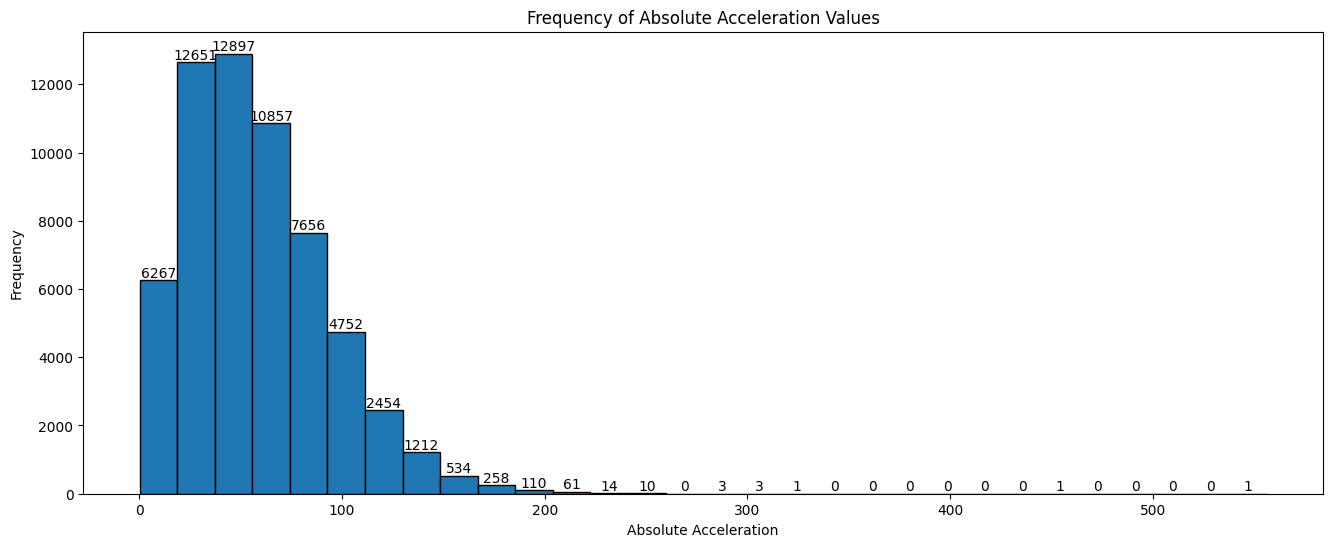

In [36]:
plt.figure(figsize=(16, 6))

counts, bins, patches = plt.hist(time_df_clean["abs_acceleration"], bins=30, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Frequency of Absolute Acceleration Values")
plt.ylabel("Frequency")
plt.xlabel("Absolute Acceleration")
plt.show()

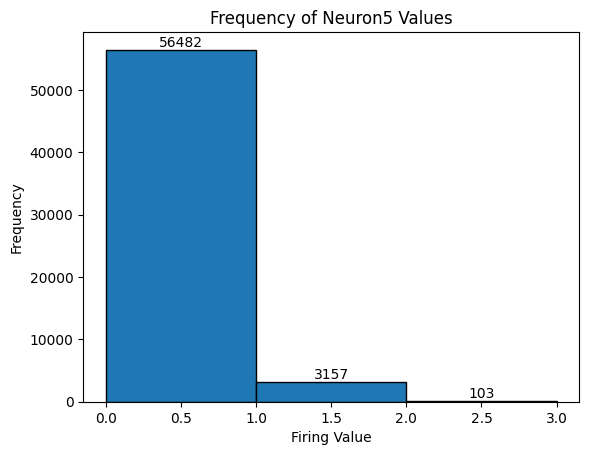

In [39]:
counts, bins, patches = plt.hist(time_df_clean["Neuron5"], bins=3, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Frequency of Neuron5 Values")
plt.ylabel("Frequency")
plt.xlabel("Firing Value")
plt.show()

### Linear Regression Exploration

Requires scikit-learn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X = time_df_clean.loc[:, 'Neuron1':'Neuron94']
y = time_df_clean['abs_acceleration']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
mse

1209.2262408709112

In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.008263536090328483